In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, MaxPooling1D, Flatten, Conv1D
from  tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

import os
print(os.getcwd())
os.environ['TF_DETERMINISTIC_OPS'] = '1'

/Users/artur/Documents/Studia/Magisterka_init


In [3]:
df = pd.read_csv('approaches/opencv/full_hand_data_big_set.csv')

df.dropna(inplace=True)

correlation_columns = ['left_landmark_1_z', 'left_landmark_2_z', 'left_landmark_3_z', 'left_landmark_4_z', 'left_landmark_12_x', 'left_landmark_12_y', 'left_landmark_11_y', 'left_landmark_11_x', 'left_landmark_8_x', 'left_landmark_10_y', 'left_landmark_19_y', 'left_landmark_20_y', 'left_landmark_7_y', 'left_landmark_8_y', 'left_landmark_14_y', 'left_landmark_18_y', 'left_landmark_15_y', 'left_landmark_10_x', 'left_landmark_6_y', 'left_landmark_7_x', 'left_landmark_17_z', 'video_id', 'label', 'frame_id']

record_columns = df[correlation_columns]

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])
categorical_labels = to_categorical(encoded_labels)

/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [4]:
features = record_columns.drop(['label', 'video_id', 'frame_id'], axis=1).values

grouped = record_columns.groupby('video_id').apply(lambda x: x.sort_values('frame_id')).reset_index(drop=True)

max_sequence_length = grouped['frame_id'].max() + 1

X = np.zeros((len(grouped['video_id'].unique()), max_sequence_length, features.shape[1]))

stratify_labels = np.array([group['label'].iloc[0] for _, group in grouped.groupby('video_id')])

label_encoder = LabelEncoder()
stratify_labels_encoded = label_encoder.fit_transform(stratify_labels)

y = np.zeros((len(grouped['video_id'].unique()), categorical_labels.shape[1]))

for i, (video_id, group) in enumerate(grouped.groupby('video_id')):
    X[i, :len(group)] = group.drop(['label', 'video_id', 'frame_id'], axis=1)
    y[i] = categorical_labels[group.index[0]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify_labels_encoded)

In [5]:
model = Sequential()

model.add(Conv1D(200, kernel_size=2, activation = 'relu', input_shape=(max_sequence_length, features.shape[1])))
model.add(Conv1D(200, kernel_size=2, activation = 'relu'))
model.add(MaxPooling1D(3))

model.add(LSTM(160, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(160))
model.add(Dense(y_train.shape[1], activation='softmax'))

2024-04-27 16:05:08.859532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 16:05:08.860561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 16:05:08.861297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [8]:
optimizer = optimizers.Adam(learning_rate=0.0002)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100


2024-04-23 22:17:09.617644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1015,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 22:17:09.617876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1015,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 22:17:09.783419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/spl

32/32 [==============================] - ETA: 0s - loss: 3.4953 - categorical_accuracy: 0.0424

2024-04-23 22:17:14.407216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 22:17:14.407517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]
2024-04-23 22:17:14.557579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

32/32 [==============================] - 5s 94ms/step - loss: 3.4953 - categorical_accuracy: 0.0424 - val_loss: 3.4874 - val_categorical_accuracy: 0.0315
Epoch 2/100
32/32 [==============================] - 2s 77ms/step - loss: 3.4588 - categorical_accuracy: 0.0365 - val_loss: 3.4434 - val_categorical_accuracy: 0.0354
Epoch 3/100
32/32 [==============================] - 2s 77ms/step - loss: 3.3336 - categorical_accuracy: 0.0700 - val_loss: 3.3127 - val_categorical_accuracy: 0.0709
Epoch 4/100
32/32 [==============================] - 2s 77ms/step - loss: 3.1921 - categorical_accuracy: 0.0906 - val_loss: 3.2228 - val_categorical_accuracy: 0.0591
Epoch 5/100
32/32 [==============================] - 2s 77ms/step - loss: 3.0689 - categorical_accuracy: 0.1113 - val_loss: 3.1856 - val_categorical_accuracy: 0.0906
Epoch 6/100
32/32 [==============================] - 3s 82ms/step - loss: 3.0223 - categorical_accuracy: 0.1172 - val_loss: 3.0915 - val_categorical_accuracy: 0.1142
Epoch 7/100
32/3

In [6]:
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True, input_shape=(max_sequence_length, y_train.shape[1]))

input_tensor = Input(shape=(max_sequence_length, y_train.shape[1]))

x = bert_layer(input_tensor)

x = LSTM(160)(x)
x = Dropout(0.2)(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


ValueError: Exception encountered when calling layer "keras_layer" (type KerasLayer).

in user code:

    File "/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorflow_hub/keras_layer.py", line 229, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (3 total):
        * <tf.Tensor 'inputs:0' shape=(None, 144, 33) dtype=float32>
        * False
        * None
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * False
        * None
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * True
        * None
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * True
        * None
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * False
        * None
      Keyword arguments: {}


Call arguments received by layer "keras_layer" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 144, 33), dtype=float32)
  • training=None

In [7]:
df.head()

,left_landmark_0_x,left_landmark_0_y,left_landmark_0_z,left_landmark_1_x,left_landmark_1_y,left_landmark_1_z,left_landmark_2_x,left_landmark_2_y,left_landmark_2_z,left_landmark_3_x,...,left_landmark_18_z,left_landmark_19_x,left_landmark_19_y,left_landmark_19_z,left_landmark_20_x,left_landmark_20_y,left_landmark_20_z,label,video_id,frame_id
0,0.278826,0.756962,3.637909e-07,0.317466,0.717196,-0.025686,0.347175,0.673366,-0.038847,0.369167,...,-0.057923,0.207700,0.570276,-0.065176,0.207899,0.579673,-0.066768,CH,0,0
1,0.283685,0.716728,6.163298e-07,0.325986,0.684222,-0.033785,0.355312,0.647923,-0.050300,0.378377,...,-0.056317,0.216864,0.548335,-0.068763,0.221583,0.571627,-0.072479,CH,0,1
2,0.287729,0.680766,6.096906e-07,0.331172,0.654878,-0.042703,0.360709,0.619580,-0.069010,0.383789,...,-0.089457,0.229501,0.526394,-0.105556,0.236726,0.551594,-0.113429,CH,0,2
3,0.281192,0.660501,7.807416e-07,0.333883,0.634206,-0.059089,0.363189,0.600230,-0.093846,0.381646,...,-0.119587,0.229948,0.497672,-0.156393,0.235155,0.519822,-0.180455,CH,0,3
4,0.276353,0.665070,6.286602e-07,0.333823,0.619357,-0.037949,0.359121,0.590931,-0.058329,0.381140,...,-0.068498,0.229885,0.486543,-0.087190,0.236844,0.503305,-0.098951,CH,0,4


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [10]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)

input_tensor = Input(shape=(max_sequence_length, features.shape[1]))

x = bert_layer(input_tensor)[1]
x = LSTM(160, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(160)(x)
output_tensor = Dense(y_train.shape[1], activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)
optimizer = Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


ValueError: Exception encountered when calling layer "keras_layer_2" (type KerasLayer).

in user code:

    File "/opt/anaconda3/envs/tf/lib/python3.11/site-packages/tensorflow_hub/keras_layer.py", line 229, in call  *
        result = smart_cond.smart_cond(training,

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (3 total):
        * <tf.Tensor 'inputs:0' shape=(None, 144, 21) dtype=float32>
        * False
        * None
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * False
        * None
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * True
        * None
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/0'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/1'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='inputs/2')]
        * True
        * None
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (3 total):
        * [TensorSpec(shape=(None, None), dtype=tf.int32, name='input_word_ids'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_mask'),
     TensorSpec(shape=(None, None), dtype=tf.int32, name='input_type_ids')]
        * False
        * None
      Keyword arguments: {}


Call arguments received by layer "keras_layer_2" (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 144, 21), dtype=float32)
  • training=None

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MultiHeadAttention, Dropout, LayerNormalization, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

df = pd.read_csv('approaches/opencv/full_hand_data_big_set.csv')
df.dropna(inplace=True)

correlation_columns = [
    'left_landmark_1_z', 'left_landmark_2_z', 'left_landmark_3_z', 'left_landmark_4_z', 'left_landmark_12_x',
    'left_landmark_12_y', 'left_landmark_11_y', 'left_landmark_11_x', 'left_landmark_8_x', 'left_landmark_10_y',
    'left_landmark_19_y', 'left_landmark_20_y', 'left_landmark_7_y', 'left_landmark_8_y', 'left_landmark_14_y',
    'left_landmark_18_y', 'left_landmark_15_y', 'left_landmark_10_x', 'left_landmark_6_y', 'left_landmark_7_x',
    'left_landmark_17_z', 'video_id', 'label', 'frame_id'
]
record_columns = df[correlation_columns]
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])
categorical_labels = to_categorical(encoded_labels)
features = record_columns.drop(['label', 'video_id', 'frame_id'], axis=1).values
grouped = record_columns.groupby('video_id').apply(lambda x: x.sort_values('frame_id')).reset_index(drop=True)
max_sequence_length = grouped['frame_id'].max() + 1
X = np.zeros((len(grouped['video_id'].unique()), max_sequence_length, features.shape[1]))
stratify_labels = np.array([group['label'].iloc[0] for _, group in grouped.groupby('video_id')])
label_encoder = LabelEncoder()
stratify_labels_encoded = label_encoder.fit_transform(stratify_labels)
y = np.zeros((len(grouped['video_id'].unique()), categorical_labels.shape[1]))
for i, (video_id, group) in enumerate(grouped.groupby('video_id')):
    X[i, :len(group)] = group.drop(['label', 'video_id', 'frame_id'], axis=1)
    y[i] = categorical_labels[group.index[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify_labels_encoded)

input_shape = X_train.shape[1:]
num_heads = 8
ff_dim = 128

inputs = Input(shape=input_shape)
x = inputs

for _ in range(2):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(0.1)(ffn_output)
    ffn_output = Dense(input_shape[-1], activation="relu")(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

x = GlobalAveragePooling1D()(x)
outputs = Dense(y_train.shape[1], activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, callbacks=[EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])


/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 144, 21)]    0           []                               
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 144, 21)     89109       ['input_6[0][0]',                
 eadAttention)                                                    'input_6[0][0]']                
                                                                                                  
 dropout_7 (Dropout)            (None, 144, 21)      0           ['multi_head_attention_3[0][0]'] 
                                                                                                  
 tf.__operators__.add_6 (TFOpLa  (None, 144, 21)     0           ['input_6[0][0]',          

2024-04-27 19:01:50.155908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1015,33]
	 [[{{node Placeholder/_11}}]]
2024-04-27 19:01:50.156138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1015,33]
	 [[{{node Placeholder/_11}}]]


32/32 [==============================] - ETA: 0s - loss: 3.5209 - categorical_accuracy: 0.0345

2024-04-27 19:02:03.945744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]
2024-04-27 19:02:03.945962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]


32/32 [==============================] - 15s 420ms/step - loss: 3.5209 - categorical_accuracy: 0.0345 - val_loss: 3.4556 - val_categorical_accuracy: 0.0276
Epoch 2/400
32/32 [==============================] - 13s 409ms/step - loss: 3.4251 - categorical_accuracy: 0.0374 - val_loss: 3.3906 - val_categorical_accuracy: 0.0591
Epoch 3/400
32/32 [==============================] - 13s 406ms/step - loss: 3.3422 - categorical_accuracy: 0.0768 - val_loss: 3.2950 - val_categorical_accuracy: 0.0984
Epoch 4/400
32/32 [==============================] - 13s 404ms/step - loss: 3.2141 - categorical_accuracy: 0.1084 - val_loss: 3.1517 - val_categorical_accuracy: 0.1063
Epoch 5/400
32/32 [==============================] - 13s 404ms/step - loss: 3.0889 - categorical_accuracy: 0.1202 - val_loss: 2.9835 - val_categorical_accuracy: 0.1654
Epoch 6/400
32/32 [==============================] - 13s 404ms/step - loss: 2.9328 - categorical_accuracy: 0.1882 - val_loss: 2.8965 - val_categorical_accuracy: 0.1811
Epoc

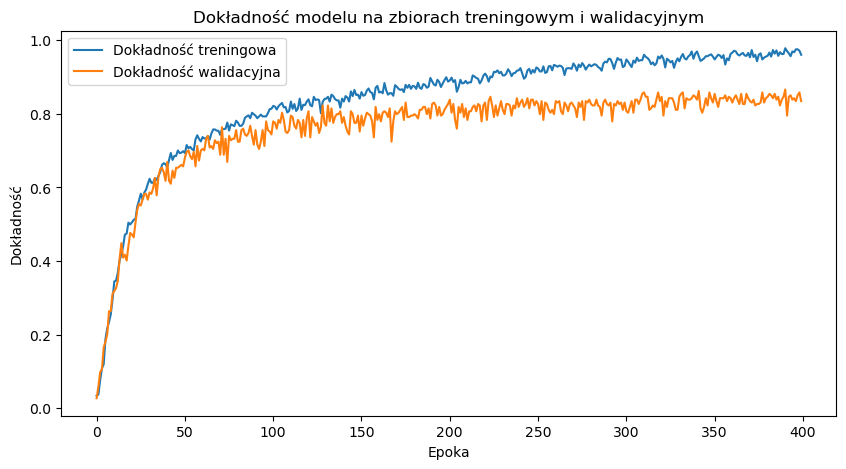

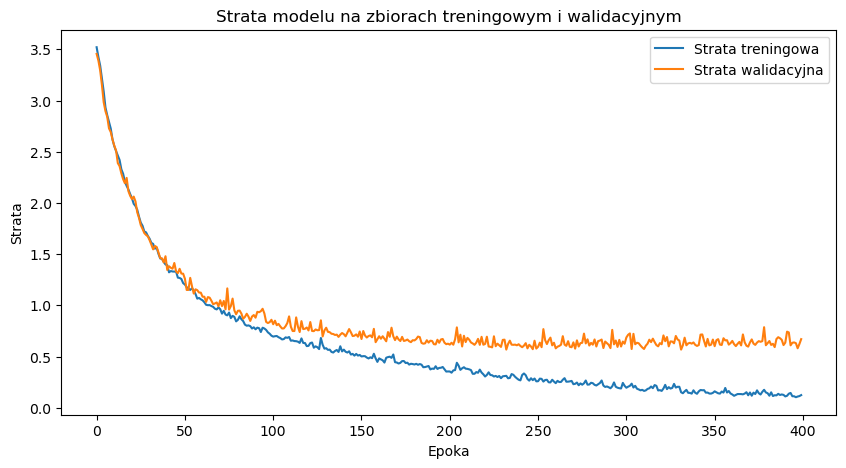

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['categorical_accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_categorical_accuracy'], label='Dokładność walidacyjna')
plt.title('Dokładność modelu na zbiorach treningowym i walidacyjnym')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Strata modelu na zbiorach treningowym i walidacyjnym')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(loc='upper right')
plt.show()


2024-04-28 12:47:13.909468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [254,144,21]
	 [[{{node Placeholder/_10}}]]
2024-04-28 12:47:13.909785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [254,144,21]
	 [[{{node Placeholder/_10}}]]


8/8 [==============================] - 2s 165ms/step


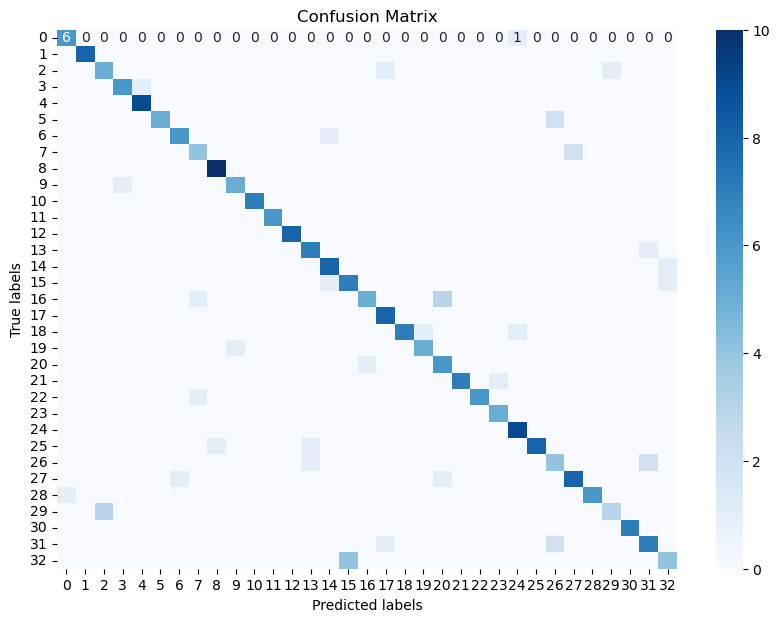

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import keras_tuner as kt
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    input_shape = X_train.shape[1:]
    num_heads = hp.Int('num_heads', min_value=4, max_value=16, step=2)
    ff_dim = hp.Int('ff_dim', min_value=64, max_value=256, step=32)
    num_transformer_blocks = hp.Int('num_transformer_blocks', min_value=1, max_value=6, step=1)

    inputs = Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        attn_output = Dropout(0.1)(attn_output)
        out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)
        ffn_output = Dense(ff_dim, activation="relu")(out1)
        ffn_output = Dropout(0.1)(ffn_output)
        ffn_output = Dense(input_shape[-1], activation="relu")(ffn_output)
        x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(y_train.shape[1], activation="softmax")(x)

    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')
    optimizer = Adam(learning_rate=learning_rate)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning_blocks'
)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)])

# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best number of Transformer blocks is {best_hps.get('num_transformer_blocks')}
The best number of heads is {best_hps.get('num_heads')}
The best feedforward dimension is {best_hps.get('ff_dim')}
The best learning rate is {best_hps.get('learning_rate')}
""")

Trial 1 Complete [00h 56m 42s]
val_categorical_accuracy: 0.6614173054695129

Best val_categorical_accuracy So Far: 0.6614173054695129
Total elapsed time: 00h 56m 42s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
4                 |12                |num_heads
192               |160               |ff_dim
5                 |3                 |num_transformer_blocks
4.2232e-05        |1.8097e-05        |learning_rate

Epoch 1/100


2024-04-28 13:53:38.065421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1015,144,21]
	 [[{{node Placeholder/_10}}]]
2024-04-28 13:53:38.065639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [1015,33]
	 [[{{node Placeholder/_11}}]]


32/32 [==============================] - ETA: 0s - loss: 3.5536 - categorical_accuracy: 0.0463

2024-04-28 13:54:04.933561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]
2024-04-28 13:54:04.933762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [254,33]
	 [[{{node Placeholder/_11}}]]


32/32 [==============================] - 30s 787ms/step - loss: 3.5536 - categorical_accuracy: 0.0463 - val_loss: 3.4064 - val_categorical_accuracy: 0.0591
Epoch 2/100
32/32 [==============================] - 25s 789ms/step - loss: 3.3863 - categorical_accuracy: 0.0690 - val_loss: 3.2939 - val_categorical_accuracy: 0.0433
Epoch 3/100
32/32 [==============================] - 25s 791ms/step - loss: 3.2462 - categorical_accuracy: 0.1192 - val_loss: 3.1837 - val_categorical_accuracy: 0.1142
Epoch 4/100
32/32 [==============================] - 25s 782ms/step - loss: 3.0724 - categorical_accuracy: 0.1399 - val_loss: 2.9535 - val_categorical_accuracy: 0.1614
Epoch 5/100
32/32 [==============================] - 25s 782ms/step - loss: 2.9166 - categorical_accuracy: 0.1675 - val_loss: 2.8225 - val_categorical_accuracy: 0.2047
Epoch 6/100
32/32 [==============================] - 25s 768ms/step - loss: 2.8167 - categorical_accuracy: 0.2079 - val_loss: 2.7324 - val_categorical_accuracy: 0.2283
Epoc